# Twitter Sentiment Analysis

### Problem Statement
The task is to build a model that will determine the tone (neutral, positive, negative) of the text. To do this, you will need to train the model on the existing data (train.csv). The resulting model will have to determine the class (neutral, positive, negative) of new texts (test data that were not used to build the model) with maximum accuracy.

### Performance metric
Source: https://www.kaggle.com/competitions/twitter-sentiment-analysis2/overview/evaluation

Metric:
    F1-score

Loading the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from tabulate import tabulate

#### Data source: https://www.kaggle.com/competitions/twitter-sentiment-analysis2/data 

#### Data description:

File descriptions
    <ul>train.csv - the training set</ul>
    <ul>test.csv - the test set</ul>

Data fields:
    <ul>ItemID - id of tweet</ul>
    <ul>SentimentText - text of the tweet</ul>
    <ul>Sentiment - sentiment</ul>
        <ul>0 - negative</ul>
        <ul>1 - positive</ul>

In [2]:
train = pd.read_csv(r"D:\Twitter Sentiment Analysis\train_old.csv", encoding='latin-1')
train.head(4)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


In [3]:
'''test = pd.read_csv(r"D:\Twitter Sentiment Analysis\test.csv")
test.head(4)'''

'test = pd.read_csv(r"D:\\Twitter Sentiment Analysis\test.csv")\ntest.head(4)'

In [4]:
print(train.shape)
#print(test.shape)

(99989, 3)


In [5]:
print("Null data in the train dataset:\n", train.isnull().any())
#print("\nNull data in the test dataset:\n", test.isnull().any())

Null data in the train dataset:
 ItemID           False
Sentiment        False
SentimentText    False
dtype: bool


<AxesSubplot:>

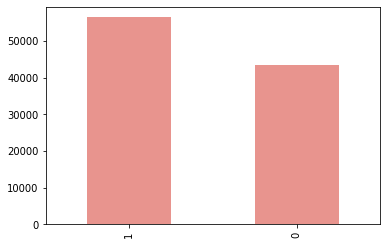

In [6]:
train['Sentiment'].value_counts().plot.bar(color='#e8948e', figsize=(6,4))

In [7]:
#train['text_length'] = train['SentimentText'].str.len()
#test['tweet_length'] = test['tweet'].str.len()

In [8]:
train.head(4)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


In [9]:
#test.head(4)

<AxesSubplot:ylabel='Frequency'>

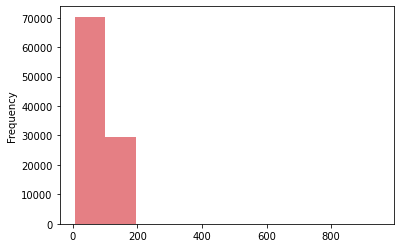

In [10]:
#train['text_length'].plot.hist(color='#E57F84', figsize=(6,4))
train['SentimentText'].str.len().plot.hist(color='#E57F84', figsize=(6,4))

In [11]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print("Stop Words :\n", stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Stop Words :
 {'its', "hasn't", 'against', "needn't", 'through', 'until', 'some', 'the', 'do', 'no', 'o', 'hadn', 'between', 'itself', 'few', 'needn', "you've", 'yourselves', 'don', 'his', "didn't", "couldn't", "doesn't", "that'll", 'can', 'doing', 'aren', 'most', 'couldn', 'by', 'just', 'a', 'we', 'these', 'does', 'of', 'above', 'under', 'yours', 'did', 'as', 'both', "she's", 'be', 'out', 'will', 'your', 'after', 'that', "won't", 'm', "shan't", 'herself', 'with', 'only', 'shouldn', 'there', 'should', "don't", 'weren', 'myself', "it's", 'has', 'ain', 'my', 'didn', 'to', 'her', 'not', 'mightn', 'he', 've', 'over', 'those', 'y', 'once', "isn't", 'up', 'him', 'our', "mustn't", 'whom', 'are', 'wouldn', 'below', 'each', 's', 'doesn', 'further', 'how', 'i', "you'd", "you'll", 'into', 'she', 'you', 'this', 'on', 'been', 'an', 'nor', 's

In [12]:
stop_words.remove('not')
stop_words.remove('no')
print("Stop Words :\n", stop_words)

Stop Words :
 {'its', "hasn't", 'against', "needn't", 'through', 'until', 'some', 'the', 'do', 'o', 'hadn', 'between', 'itself', 'few', 'needn', "you've", 'yourselves', 'don', 'his', "didn't", "couldn't", "doesn't", "that'll", 'can', 'doing', 'aren', 'most', 'couldn', 'by', 'just', 'a', 'we', 'these', 'does', 'of', 'above', 'under', 'yours', 'did', 'as', 'both', "she's", 'be', 'out', 'will', 'your', 'after', 'that', "won't", 'm', "shan't", 'herself', 'with', 'only', 'shouldn', 'there', 'should', "don't", 'weren', 'myself', "it's", 'has', 'ain', 'my', 'didn', 'to', 'her', 'mightn', 'he', 've', 'over', 'those', 'y', 'once', "isn't", 'up', 'him', 'our', "mustn't", 'whom', 'are', 'wouldn', 'below', 'each', 's', 'doesn', 'further', 'how', 'i', "you'd", "you'll", 'into', 'she', 'you', 'this', 'on', 'been', 'an', 'nor', 'same', 'about', 'them', 'haven', 'mustn', "weren't", 'me', 'or', 'when', 'being', 'if', "wasn't", 'down', 'd', 'were', 'wasn', 'from', 'isn', 'll', "shouldn't", "aren't", 'wh

In [13]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(train['SentimentText'])

sum_words = words.sum(axis=0)

word_freq = [(word, sum_words[0,i]) for word,i in cv.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x:x[1], reverse=True)

Text(0.5, 1.0, 'Word Cloud for Setiment Text')

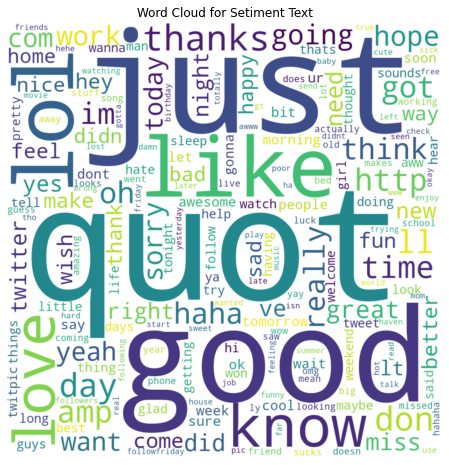

In [14]:
wc = WordCloud(background_color='White', width = 1000, height = 1000).generate_from_frequencies(dict(word_freq))
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear')
plt.title("Word Cloud for Setiment Text")

Text(0.5, 1.0, 'Word Cloud for positive words')

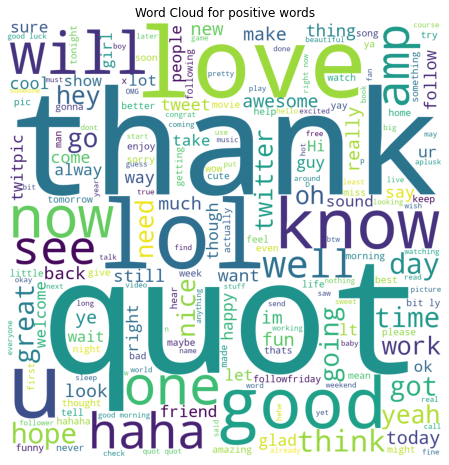

In [15]:
positive_words = ' '.join([word for word in train['SentimentText'][train['Sentiment']==1]])
positive_wc = WordCloud(background_color='White', width = 1000, height = 1000).generate(positive_words)
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(positive_wc)
plt.title("Word Cloud for positive words")

Text(0.5, 1.0, 'Word Cloud for negative words')

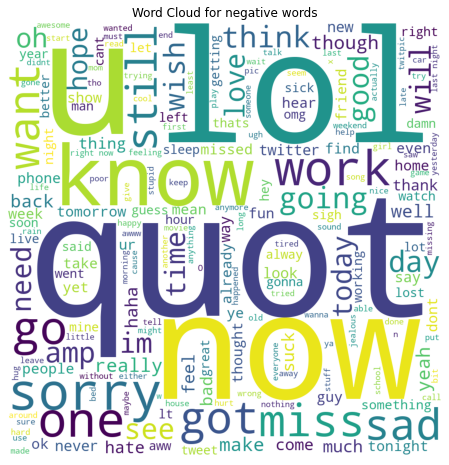

In [16]:
negative_words = ' '.join([word for word in train['SentimentText'][train['Sentiment']==0]])
negative_wc = WordCloud(background_color='White', width = 1000, height = 1000).generate(negative_words)
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.imshow(negative_wc)
plt.title("Word Cloud for negative words")

In [17]:
snow_stemmer = SnowballStemmer(language='english')

In [18]:
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
def text_preprocessing(text):
    text = ' '.join(words.lower() for words in text.split(" ") if words not in stop_words)
    text = ' '.join(words for words in text.split(" ") if len(words)>2)
    text = re.sub('@[^\s]+', '', text) 
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text) 
    text = re.sub('[^a-zA-Z\n]', ' ', text)
    text = re.sub('\s+',' ', text)
    text = re.sub("\n", " ", text)
    text = re.sub("\t", " ", text)  
    text = re.sub(",", ", ", text)
    text = decontracted(text)
    text = re.sub(r'[^\w\s]', '', text)
    word_list = nltk.word_tokenize(text)
    text = ' '.join(snow_stemmer.stem(word) for word in word_list)
    return text.strip()

In [20]:
train["SentimentText"] = train["SentimentText"].apply(text_preprocessing) 
#test["tweet"] = test["tweet"].apply(text_preprocessing) 

In [21]:
train.head()

,ItemID,Sentiment,SentimentText
0,1,0,sad apl friend
1,2,0,miss new moon trailer
2,3,1,omg alreadi
3,4,0,omgaga sooo gunna cri i ve dentist sinc supos ...
4,5,0,think cheat me t t


In [22]:
#test.head()

In [23]:
train["SentimentText"][0]

'sad apl friend'

In [24]:
Y = train['Sentiment'].values
X = train.drop(['Sentiment'], axis=1)

In [25]:
print(X.shape)
print(Y.shape)

(99989, 2)
(99989,)


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, stratify=Y)

In [27]:
'''Y_train = train['label']
X_train = train[['id','tweet','tweet_length']]

X_test = test[['id','tweet','tweet_length']]'''

"Y_train = train['label']\nX_train = train[['id','tweet','tweet_length']]\n\nX_test = test[['id','tweet','tweet_length']]"

In [28]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(66992, 2)
(66992,)
(32997, 2)
(32997,)


In [29]:
#scaler = StandardScaler()

In [30]:
#X_train['text_length'] = scaler.fit_transform(X_train['text_length'].reshape(-1,1))
#X_test['text_length'] = scaler.transform(X_test['text_length'].reshape(-1,1))

In [31]:
X_train.head(2)

,ItemID,SentimentText
76779,76791,have fun
39145,39157,offer way there


In [32]:
X_test.head(2)

,ItemID,SentimentText
9163,9175,quot how s go quot rhetor question often ask w...
41065,41077,love movi not funni nois hilari made refer goo...


In [33]:
tfidf_vectorizer = TfidfVectorizer(min_df=8, ngram_range=(1,3))
X_train_text_tfidf = tfidf_vectorizer.fit_transform(X_train['SentimentText'].values)
X_test_text_tfidf = tfidf_vectorizer.transform(X_test['SentimentText'].values)

In [34]:
print(X_train_text_tfidf.shape)
print(X_test_text_tfidf.shape)

(66992, 8815)
(32997, 8815)


In [35]:
'''#X_train_w2v = X_train.drop(['SentimentText'], axis=1)
#X_test_w2v = X_test.drop(['SentimentText'], axis=1)
X_train_tfidf = X_train.drop(['SentimentText'], axis=1)
X_test_tfidf = X_test.drop(['SentimentText'], axis=1)'''

"#X_train_w2v = X_train.drop(['SentimentText'], axis=1)\n#X_test_w2v = X_test.drop(['SentimentText'], axis=1)\nX_train_tfidf = X_train.drop(['SentimentText'], axis=1)\nX_test_tfidf = X_test.drop(['SentimentText'], axis=1)"

In [36]:
'''#X_train_w2v.shape
X_train_tfidf.shape'''

'#X_train_w2v.shape\nX_train_tfidf.shape'

In [37]:
'''#X_test_w2v.shape
X_test_tfidf.shape'''

'#X_test_w2v.shape\nX_test_tfidf.shape'

In [38]:
#train_text_w2v = pd.DataFrame(X_train_tfidf_w2v_vectors)
#train_text_w2v.shape
train_text_tfidf = pd.DataFrame(X_train_text_tfidf.toarray().tolist())
train_text_tfidf.shape

(66992, 8815)

In [39]:
#test_text_w2v = pd.DataFrame(X_test_tfidf_w2v_vectors)
#test_text_w2v.shape
test_text_tfidf = pd.DataFrame(X_test_text_tfidf.toarray().tolist())
test_text_tfidf.shape

(32997, 8815)

In [40]:
'''#X_train_w2v = pd.concat([X_train_w2v, train_text_w2v.set_index(X_train_w2v.index)], axis=1)
#X_train_w2v.shape
X_train_tfidf = pd.concat([X_train_tfidf, train_text_tfidf.set_index(X_train_tfidf.index)], axis=1)
X_train_tfidf.shape'''

'#X_train_w2v = pd.concat([X_train_w2v, train_text_w2v.set_index(X_train_w2v.index)], axis=1)\n#X_train_w2v.shape\nX_train_tfidf = pd.concat([X_train_tfidf, train_text_tfidf.set_index(X_train_tfidf.index)], axis=1)\nX_train_tfidf.shape'

In [41]:
'''#X_test_w2v = pd.concat([X_test_w2v, test_text_w2v.set_index(X_test_w2v.index)], axis=1)
#X_test_w2v.shape
X_test_tfidf = pd.concat([X_test_tfidf, test_text_tfidf.set_index(X_test_tfidf.index)], axis=1)
X_test_tfidf.shape'''

'#X_test_w2v = pd.concat([X_test_w2v, test_text_w2v.set_index(X_test_w2v.index)], axis=1)\n#X_test_w2v.shape\nX_test_tfidf = pd.concat([X_test_tfidf, test_text_tfidf.set_index(X_test_tfidf.index)], axis=1)\nX_test_tfidf.shape'

In [42]:
'''#print(X_train_w2v.shape)
#print(Y_train.shape)
print(X_train_tfidf.shape)
print(Y_train.shape)'''

'#print(X_train_w2v.shape)\n#print(Y_train.shape)\nprint(X_train_tfidf.shape)\nprint(Y_train.shape)'

### Logisitic Regression

In [43]:
parameters = {"C":[10**-x for x in range(-4,5)]}

model = LogisticRegression(penalty='l2', random_state=0)
clf_log = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
clf_log.fit(X_train_text_tfidf,Y_train)

print("Best estimator=", clf_log.best_estimator_)
print("Best score =", clf_log.best_score_)

Best estimator= LogisticRegression(C=1, random_state=0)
Best score = 0.7567619760579101


The f1 score for logistice regression model is  0.7926120286052374
The confusion matrix on the test dataset for logistic regression:


<AxesSubplot:>

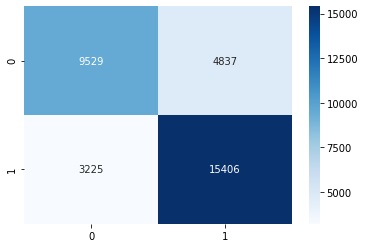

In [44]:
model_log = LogisticRegression(C= clf_log.best_params_['C'], penalty='l2', random_state=0)
model_log.fit(X_train_text_tfidf, Y_train)

Y_pred = model_log.predict(X_test_text_tfidf)

f1_score_log = f1_score(Y_test, Y_pred)
print("The f1 score for logistice regression model is ", f1_score_log)

cm_log = confusion_matrix(Y_test, Y_pred)
print("The confusion matrix on the test dataset for logistic regression:")
#print(cm_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')

### Naive Bayes

In [45]:
multiNB = MultinomialNB()
parameters = {'alpha':[10 ** x for x in range(-7, 7)]}
clf_NB = GridSearchCV(multiNB, parameters, cv=10, n_jobs=-1)
clf_NB.fit(X_train_text_tfidf, Y_train)

print("Best estimator=", clf_NB.best_estimator_)
print("Best score =", clf_NB.best_score_)

Best estimator= MultinomialNB(alpha=1)
Best score = 0.7482834149895395


The f1 score for Naive Bayes model is  0.7882837110049792
The confusion matrix on the test dataset for Naive Bayes:


<AxesSubplot:>

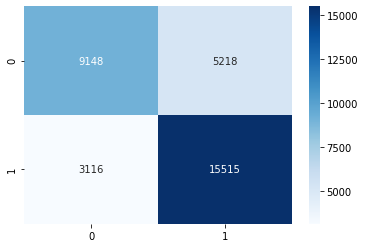

In [46]:
model_NB = MultinomialNB(alpha= clf_NB.best_params_['alpha'])
model_NB.fit(X_train_text_tfidf, Y_train)

Y_pred = model_NB.predict(X_test_text_tfidf)

f1_score_NB = f1_score(Y_test, Y_pred)
print("The f1 score for Naive Bayes model is ", f1_score_NB)

cm_NB = confusion_matrix(Y_test, Y_pred)
print("The confusion matrix on the test dataset for Naive Bayes:")
#print(cm_NB)
sns.heatmap(cm_NB, annot=True, fmt='d', cmap='Blues')

### Random Forest

In [47]:
model_RF = RandomForestClassifier()
parameters={'min_samples_split':[4,6,8,10,12, 15], 'n_estimators':[50, 75, 100, 200, 300]}
clf_RF = GridSearchCV(model_RF, parameters, cv=10, n_jobs=-1)
clf_RF.fit(X_train_text_tfidf, Y_train)

print("Best estimator=", clf_RF.best_estimator_)
print("Best score=", clf_RF.best_score_)

Best estimator= RandomForestClassifier(min_samples_split=12, n_estimators=300)
Best score= 0.7451785073735666


The f1 score for Random Forest model is  0.7767873480590772
The confusion matrix on the test dataset for Random Forest:


<AxesSubplot:>

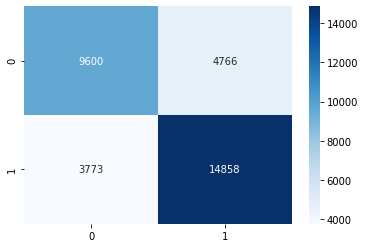

In [48]:
model_RF = RandomForestClassifier(min_samples_split= clf_RF.best_params_['min_samples_split'], n_estimators= clf_RF.best_params_['n_estimators'])
model_RF.fit(X_train_text_tfidf, Y_train)

Y_pred = model_RF.predict(X_test_text_tfidf)

f1_score_RF = f1_score(Y_test, Y_pred)
print("The f1 score for Random Forest model is ", f1_score_RF)

cm_RF = confusion_matrix(Y_test, Y_pred)
print("The confusion matrix on the test dataset for Random Forest:")
#print(cm_RF)
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='Blues')

### Gradient Boosting Decision Trees

In [49]:
model_GBDT = GradientBoostingClassifier()
parameters = {'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7], 'n_estimators':[50, 100, 200, 300, 500]}
clf_GBDT = GridSearchCV(model_GBDT, parameters, cv=10, n_jobs=-1)
clf_GBDT.fit(X_train_text_tfidf, Y_train)

print("Best estimator=", clf_GBDT.best_estimator_)
print("Best score=", clf_GBDT.best_score_)

Best estimator= GradientBoostingClassifier(learning_rate=0.3, n_estimators=500)
Best score= 0.7430290352982066


The f1 score for Gradient Boosting Decision Tree model is  0.7891142899865424
The confusion matrix on the test dataset for Gradient Boosting Decision Tree:


<AxesSubplot:>

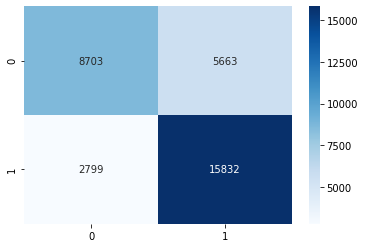

In [50]:
model_GBDT = GradientBoostingClassifier(learning_rate= clf_GBDT.best_params_['learning_rate'], n_estimators= clf_GBDT.best_params_['n_estimators'])
model_GBDT.fit(X_train_text_tfidf, Y_train)

Y_pred = model_GBDT.predict(X_test_text_tfidf)

f1_score_GBDT = f1_score(Y_test, Y_pred)
print("The f1 score for Gradient Boosting Decision Tree model is ", f1_score_GBDT)

cm_GBDT = confusion_matrix(Y_test, Y_pred)
print("The confusion matrix on the test dataset for Gradient Boosting Decision Tree:")
#print(cm_GBDT)
sns.heatmap(cm_GBDT, annot=True, fmt='d', cmap='Blues')

### Linear SVC

In [51]:
model_SVC = LinearSVC()
parameters = {"C":[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_SVC = GridSearchCV(model_SVC, parameters, cv=10, n_jobs=-1)
clf_SVC.fit(X_train_text_tfidf, Y_train)

print("Best estimator= ", clf_SVC.best_estimator_)
print("Best score= ", clf_SVC.best_score_)

Best estimator=  LinearSVC(C=0.1)
Best score=  0.7565977858134316


The f1 score for Gradient linear SVC model is  0.7931864754098361
The confusion matrix on the test dataset for linear SVC:


<AxesSubplot:>

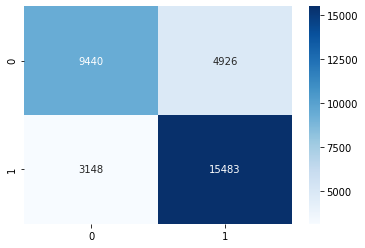

In [56]:
model_SVC = LinearSVC(C=clf_SVC.best_params_["C"])
model_SVC.fit(X_train_text_tfidf,Y_train)

Y_pred = model_SVC.predict(X_test_text_tfidf)

f1_score_SVC = f1_score(Y_test, Y_pred)
print("The f1 score for Gradient linear SVC model is ", f1_score_SVC)

cm_SVC = confusion_matrix(Y_test, Y_pred)
print("The confusion matrix on the test dataset for linear SVC:")
#print(cm_SVC)
sns.heatmap(cm_SVC, annot=True, fmt='d', cmap='Blues')

## Summary

In [57]:
'''# assigning data
table_data = [("Logistic Regression", "TFIDF", "C: " + clf_log.best_params_['C'], f1_score_log)
              ,("Naive Bayes", "TFIDF", "alpha: " + clf_NB.best_params_['alpha'], f1_score_NB)
              ,("Random Forest", "TFIDF", "min_samples_split: " + clf_RF.best_params_['min_samples_split'] + "n_estimators" + clf_RF.best_params_['n_estimators'], f1_score_RF)
              ,("Gradient Boosting Decision Trees", "TFIDF", "learning_rate: " + clf_GBDT.best_params_['learning_rate'] + "n_estimators" + clf_GBDT.best_params_['n_estimators'], f1_score_GBDT)
              ,("Linear SVC", "TFIDF", "C: " + clf_SVC.best_params_['learning_rate'], f1_score_SVC)]

# creating header
table_head = ["Model", "Vectorizer", "Best estimators", "F1 Score"]

# displaying the table
print(tabulate(table_data, headers=table_head, tablefmt="grid"))'''

'# assigning data\ntable_data = [("Logistic Regression", "TFIDF", "C: " + clf_log.best_params_[\'C\'], f1_score_log)\n              ,("Naive Bayes", "TFIDF", "alpha: " + clf_NB.best_params_[\'alpha\'], f1_score_NB)\n              ,("Random Forest", "TFIDF", "min_samples_split: " + clf_RF.best_params_[\'min_samples_split\'] + "n_estimators" + clf_RF.best_params_[\'n_estimators\'], f1_score_RF)\n              ,("Gradient Boosting Decision Trees", "TFIDF", "learning_rate: " + clf_GBDT.best_params_[\'learning_rate\'] + "n_estimators" + clf_GBDT.best_params_[\'n_estimators\'], f1_score_GBDT)\n              ,("Linear SVC", "TFIDF", "C: " + clf_SVC.best_params_[\'learning_rate\'], f1_score_SVC)]\n\n# creating header\ntable_head = ["Model", "Vectorizer", "Best estimators", "F1 Score"]\n\n# displaying the table\nprint(tabulate(table_data, headers=table_head, tablefmt="grid"))'

In [58]:
# assigning data
table_data = [("Logistic Regression", "TFIDF", f1_score_log)
              ,("Naive Bayes", "TFIDF", f1_score_NB)
              ,("Random Forest", "TFIDF", f1_score_RF)
              ,("Gradient Boosting Decision Trees", "TFIDF", f1_score_GBDT)
              ,("Linear SVC", "TFIDF", f1_score_SVC)]

# creating header
table_head = ["Model", "Vectorizer", "F1 Score"]

# displaying the table
print(tabulate(table_data, headers=table_head, tablefmt="grid"))

+----------------------------------+--------------+------------+
| Model                            | Vectorizer   |   F1 Score |
+==================================+==============+============+
| Logistic Regression              | TFIDF        |   0.792612 |
+----------------------------------+--------------+------------+
| Naive Bayes                      | TFIDF        |   0.788284 |
+----------------------------------+--------------+------------+
| Random Forest                    | TFIDF        |   0.776787 |
+----------------------------------+--------------+------------+
| Gradient Boosting Decision Trees | TFIDF        |   0.789114 |
+----------------------------------+--------------+------------+
| Linear SVC                       | TFIDF        |   0.793186 |
+----------------------------------+--------------+------------+


Conclusion:
    As we can see from the above table, the f1 score of linear SVC with TF-IDF vectorization is the highest.